## Introduction to Regression with Neural Networks in TensorFlow
Thera ara many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit

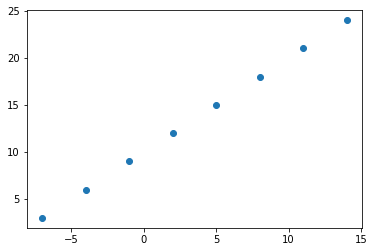

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in order words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 356ms/step - loss: 18.2219 - mae: 18.2219
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 17.9406 - mae: 17.9406
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 17.6594 - mae: 17.6594
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 17.3781 - mae: 17.3781
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 17.0969 - mae: 17.0969


In [19]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [28]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 87ms/step


array([[-13.218478]], dtype=float32)

In [29]:
y_pred + 11

array([[-2.2184782]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units( also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [32]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 369ms/step - loss: 18.1976 - mae: 18.1976
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 17.9164 - mae: 17.9164
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 17.6351 - mae: 17.6351
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 17.3539 - mae: 17.3539
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 17.0726 - mae: 17.0726
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 16.7914 - mae: 16.7914
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 16.5101 - mae: 16.5101
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 16.2289 - mae: 16.2289
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 15.9476 - mae: 15.9476
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 15.6664 - mae: 15.6664
Epoch 11/100
1/1 [==============================]

In [33]:
# Remind ourselfs of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [34]:
# Let's see if our model's prediction has improved...
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 237ms/step


array([[29.670109]], dtype=float32)

In [54]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layers with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 781ms/step - loss: 13.8488 - mae: 13.8488
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9710 - mae: 10.9710
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5930 - mae: 8.5930
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 6.2278 - mae: 6.2278
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 4.0186 - mae: 4.0186
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 5.3094 - mae: 5.3094
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 6.2780 - mae: 6.2780
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.4164 - mae: 6.4164
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 5.9964 - mae: 5.9964
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 5.2391 - mae: 5.2391
Epoch 11/100
1/1 [==============================] - 0s 11ms/step 

In [38]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [55]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[27.076963]], dtype=float32)